In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

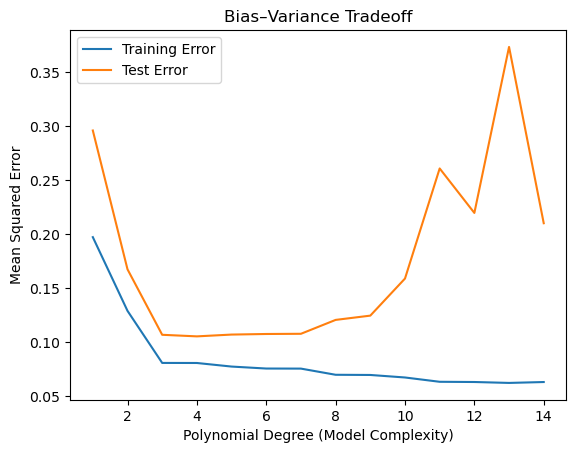

In [3]:
# Synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(120, 1), axis=0)
y = np.sin(X) + 0.3 * np.random.randn(120, 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

degrees = range(1, 15)

train_errors = []
test_errors = []

for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot error curves
plt.figure()
plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Test Error")
plt.xlabel("Polynomial Degree (Model Complexity)")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff")
plt.legend()
plt.show()

**As model complexity increases, training error monotonically decreases because the model can fit the data more closely. However, test error initially decreases as the model captures underlying structure, then increases once the model begins fitting noise, indicating overfitting**

**The U-shaped test error curve illustrates the bias–variance tradeoff. Low-degree models suffer from high bias (underfitting), while high-degree models suffer from high variance (overfitting). The optimal model lies near the minimum of the test error curve.**

# Bias–Variance Tradeoff Curve

## Objective
This notebook visualizes how model complexity affects:

- Training error
- Test error

Across polynomial regression models.

---

## Dataset
Synthetic nonlinear dataset with noise:

\[
y = \sin(X) + \epsilon
\]

---

## Methodology
For polynomial degrees 1–14:

1. Train model  
2. Compute training MSE  
3. Compute test MSE  

---

## Results
The plot shows:

- Training error decreases monotonically
- Test error follows a U-shaped curve

---

## Interpretation

### Low Degree
- High bias
- Underfitting

---

### Intermediate Degree
- Optimal bias–variance balance
- Lowest test error

---

### High Degree
- High variance
- Overfitting

---

## Key Insight
Model complexity must be tuned to minimize generalization error.

---

## Conclusion
Bias–variance tradeoff is central to model selection.
